## Testing features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import parselmouth
import soundfile as sf
import librosa
import os
import glob
import re

In [2]:
df = pd.read_csv("..\\dataset_key_v1.csv")
df

,Unnamed: 0,caminho,arquivo_wav,arquivo_sem_wav,classe,index_na_classe,index_classification
0,0,C:\Users\vinic\Documents\datasets\sinais_renom...,edema1.wav,edema1,edema,1,1
1,1,C:\Users\vinic\Documents\datasets\sinais_renom...,edema10.wav,edema10,edema,10,1
2,2,C:\Users\vinic\Documents\datasets\sinais_renom...,edema11.wav,edema11,edema,11,1
3,3,C:\Users\vinic\Documents\datasets\sinais_renom...,edema12.wav,edema12,edema,12,1
4,4,C:\Users\vinic\Documents\datasets\sinais_renom...,edema13.wav,edema13,edema,13,1
...,...,...,...,...,...,...,...
162,162,C:\Users\vinic\Documents\datasets\sinais_renom...,paralisia52.wav,paralisia52,paralisia,52,1
163,163,C:\Users\vinic\Documents\datasets\sinais_renom...,paralisia6.wav,paralisia6,paralisia,6,1
164,164,C:\Users\vinic\Documents\datasets\sinais_renom...,paralisia7.wav,paralisia7,paralisia,7,1
165,165,C:\Users\vinic\Documents\datasets\sinais_renom...,paralisia8.wav,paralisia8,paralisia,8,1


In [3]:
sinal = df["caminho"][0]
sinal

'C:\\Users\\vinic\\Documents\\datasets\\sinais_renomeados_kay\\Edema\\edema1.wav'

In [4]:
data, samplerate = sf.read(sinal)
print(samplerate)

25000


In [17]:
0.02048*samplerate

512.0

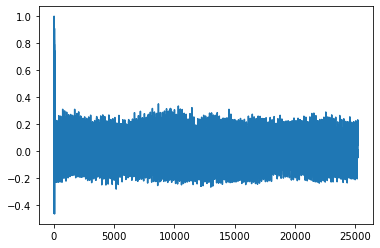

In [6]:
plt.plot(data)
plt.show()

In [8]:
librosa.lpc(data, order = 29)

array([ 1.00000000e+00, -3.71161369e-01, -6.98330773e-01, -1.83629875e-01,
        2.99101067e-01, -2.51778318e-01,  2.48225029e-02,  1.67258203e-01,
        7.63119109e-02, -1.22649106e-03,  9.50921920e-02,  6.66172822e-02,
       -5.66810578e-02, -2.09298483e-01, -8.06922651e-02,  7.98182716e-02,
       -5.69610994e-02, -5.49184570e-02,  1.44634358e-01,  1.35613834e-01,
       -1.46334941e-01, -3.28135785e-04,  2.47555297e-01, -4.73114650e-02,
       -2.09996648e-01, -1.55580014e-01,  8.09362243e-02,  2.23984870e-01,
        6.26758069e-02, -1.42931718e-01])

In [60]:
x=librosa.feature.mfcc(data, n_mfcc=12, window = 'hamming')
np.shape(x)

C:\Users\vinic\AppData\Local\Temp\ipykernel_8916\397054330.py:1: FutureWarning: Pass y=[ 6.19323730e-01  6.04064941e-01  6.50512695e-01 ...  9.46044922e-03
 -4.88281250e-04 -4.54711914e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x=librosa.feature.mfcc(data, n_mfcc=12, window = 'hamming')


(12, 50)

In [57]:
np.mean(librosa.feature.mfcc(data, n_mfcc=12, window = 'hamming'), axis=1, keepdims=True)

C:\Users\vinic\AppData\Local\Temp\ipykernel_8916\2988029922.py:1: FutureWarning: Pass y=[ 6.19323730e-01  6.04064941e-01  6.50512695e-01 ...  9.46044922e-03
 -4.88281250e-04 -4.54711914e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  np.mean(librosa.feature.mfcc(data, n_mfcc=12, window = 'hamming'), axis=1, keepdims=True)


array([[-163.13142054],
       [  88.11747717],
       [  28.99710601],
       [ -17.6660007 ],
       [  20.90822851],
       [ -19.86980528],
       [  39.23583929],
       [  -1.34151624],
       [ -22.41461229],
       [   5.6088064 ],
       [  11.50983873],
       [  20.36011153]])

In [18]:
frame_length = int(0.02048*samplerate)
hop_length = frame_length // 2
print('amostras de frame: ', frame_length)
print('amostras de sobreposição: ', hop_length)

amostras de frame:  512
amostras de sobreposição:  256


In [48]:
last_sf = len(data) - frame_length
window = np.hamming(frame_length)
conta = 0
ordem = (25000 // 1000) + 4
ff = []
for start in range(0, last_sf + 1, hop_length):
    end_sf = start + frame_length
    fi = data[start : end_sf]
    fi_w = fi * window
    f_lpc = librosa.lpc(fi_w, order = ordem)
    ff.append(f_lpc[1:])
    conta += 1
    #print(fi)
print(conta)
np.shape(ff)

97


(97, 29)

In [49]:
ff

[array([-0.43378251, -0.48972336, -0.16910512,  0.12163627, -0.22485993,
         0.00232371,  0.18716561,  0.18884462, -0.08023566,  0.0235838 ,
         0.0727942 , -0.16857682, -0.1896194 ,  0.00888732,  0.10908173,
        -0.02202751,  0.02346302,  0.14707067, -0.01890797, -0.11476444,
        -0.01255367,  0.17978694, -0.02319904, -0.05812926, -0.10729572,
        -0.02105354,  0.13458395,  0.09916393, -0.12191628]),
 array([-0.4023708 , -1.29197181, -0.09740744,  1.33954505, -0.36497189,
        -0.5913775 ,  0.10008809,  0.54169157, -0.1188376 ,  0.29002793,
        -0.28657343, -0.06634681, -0.08605765, -0.02282581, -0.30630797,
         0.24778264,  0.07510411,  0.06149544,  0.01550789, -0.10760143,
         0.10551565,  0.53359385, -0.28368875, -0.7160531 ,  0.15790813,
         0.43011863, -0.07543378, -0.14224933,  0.08423626]),
 array([-0.55382019, -1.19436545,  0.09675188,  1.36645011, -0.6395389 ,
        -0.57012968,  0.12565101,  0.66693487, -0.0425085 ,  0.14903256,


In [52]:
np.nanmean(ff, axis=0)

array([-0.47728882, -1.22803101,  0.0384765 ,  1.30690827, -0.55244761,
       -0.61734387,  0.2624852 ,  0.49309876, -0.11743319,  0.31489579,
       -0.26081514, -0.20098099,  0.00714706,  0.12063708, -0.39933033,
        0.07002527,  0.23854206,  0.12736303, -0.21391787, -0.07031825,
        0.31574319,  0.41812136, -0.45455189, -0.51040006,  0.24511477,
        0.31981629, -0.15377424, -0.10942992,  0.11041708])

In [38]:
librosa.lpc(data, order = 29, axis = 0)

array([ 1.00000000e+00, -3.71161369e-01, -6.98330773e-01, -1.83629875e-01,
        2.99101067e-01, -2.51778318e-01,  2.48225029e-02,  1.67258203e-01,
        7.63119109e-02, -1.22649106e-03,  9.50921920e-02,  6.66172822e-02,
       -5.66810578e-02, -2.09298483e-01, -8.06922651e-02,  7.98182716e-02,
       -5.69610994e-02, -5.49184570e-02,  1.44634358e-01,  1.35613834e-01,
       -1.46334941e-01, -3.28135785e-04,  2.47555297e-01, -4.73114650e-02,
       -2.09996648e-01, -1.55580014e-01,  8.09362243e-02,  2.23984870e-01,
        6.26758069e-02, -1.42931718e-01])

In [58]:
def get_lpc(signal, order = 12, sr = 25000, frame_length = 512, hop_length = 256):
    '''
    função para extrair LPCs
    
    retorna um vetor de média sobre frames
    e a matrix para todos os frames
    '''
    ordem = (sr // 1000) + 4
    window = np.hamming(frame_length)
    last_sf = len(signal) - frame_length
    ff = []
    for start in range(0, last_sf + 1, hop_length):
        end_sf = start + frame_length
        fi = data[start : end_sf]
        fi_w = fi * window
        f_lpc = librosa.lpc(fi_w, order = ordem)
        ff.append(f_lpc[1:])

    media_lpc = np.nanmean(ff, axis = 0)
    lpcs = ff

    return media_lpc , lpcs
    


In [81]:
def get_mfcc(signal, sr = 25000, order = 12, frame_length = 512, hop_length = 256):
    ''' 
    função para calcular MFCCs
    
    '''
    coeffs = librosa.feature.mfcc(signal, n_mfcc = order, 
                                  sr = sr,
                                  n_fft = frame_length,
                                  hop_length = hop_length,
                                  window = 'hamming')
    
    media_coeffs = np.nanmean(coeffs, axis = 1)

    return media_coeffs, coeffs.T

In [83]:
def get_delta_mfcc(signal, sr = 25000, order = 12, frame_length = 512, hop_length = 256):
    ''' 
    função para calcular delta-MFCCs
    
    '''
    coeffs = librosa.feature.mfcc(signal, n_mfcc = order, 
                                  sr = sr,
                                  n_fft = frame_length,
                                  hop_length = hop_length,
                                  window = 'hamming')
    
    delta_coeffs = librosa.feature.delta(coeffs, order=1)
    
    media_coeffs = np.nanmean(delta_coeffs, axis = 1)

    return media_coeffs, delta_coeffs.T

In [84]:
def get_delta_delta_mfcc(signal, sr = 25000, order = 12, frame_length = 512, hop_length = 256):
    ''' 
    função para calcular delta-MFCCs
    
    '''
    coeffs = librosa.feature.mfcc(signal, n_mfcc = order, 
                                  sr = sr,
                                  n_fft = frame_length,
                                  hop_length = hop_length,
                                  window = 'hamming')
    
    delta_delta_coeffs = librosa.feature.delta(coeffs, order=2)
    
    media_coeffs = np.nanmean(delta_delta_coeffs, axis = 1)

    return media_coeffs, delta_delta_coeffs.T

In [85]:
m_lpcs, lpcs = get_lpc(data)
np.shape(lpcs)

(97, 29)

In [82]:
m_mfcc, mfccs = get_mfcc(data)
np.shape(mfccs)

C:\Users\vinic\AppData\Local\Temp\ipykernel_8916\1549925914.py:6: FutureWarning: Pass y=[ 6.19323730e-01  6.04064941e-01  6.50512695e-01 ...  9.46044922e-03
 -4.88281250e-04 -4.54711914e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  coeffs = librosa.feature.mfcc(signal, n_mfcc = order,


(99, 12)

In [22]:
import numpy
import math

def framesig(sig,frame_len,frame_step,winfunc=lambda x:numpy.ones((x,))):
    """Frame a signal into overlapping frames.

    :param sig: the audio signal to frame.
    :param frame_len: length of each frame measured in samples.
    :param frame_step: number of samples after the start of the previous frame that the next frame should begin.
    :param winfunc: the analysis window to apply to each frame. By default no window is applied.    
    :returns: an array of frames. Size is NUMFRAMES by frame_len.
    """
    slen = len(sig)
    frame_len = int(round(frame_len))
    frame_step = int(round(frame_step))
    if slen <= frame_len: 
        numframes = 1
    else:
        numframes = 1 + int(math.ceil((1.0*slen - frame_len)/frame_step))
        
    padlen = int((numframes-1)*frame_step + frame_len)
    
    zeros = numpy.zeros((padlen - slen,))
    padsignal = numpy.concatenate((sig,zeros))
    
    indices = numpy.tile(numpy.arange(0,frame_len),(numframes,1)) + numpy.tile(numpy.arange(0,numframes*frame_step,frame_step),(frame_len,1)).T
    indices = numpy.array(indices,dtype=numpy.int32)
    frames = padsignal[indices]
    win = numpy.tile(winfunc(frame_len),(numframes,1))
    wind=numpy.tile(numpy.hamming(frame_len),(numframes,1))
    return frames*wind

In [25]:
fra = 0.02048
frams = fra //2
frames = framesig(data,frame_length,hop_length)
np.shape(frames)

(98, 512)

In [86]:
valor = 10
n = 15
vetor=[valor] * n
vetor

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [96]:
from praat_class import Sinal

a=Sinal(sinal)
a.carrega()
a.pitch()
print(a.meanF0)
print(a.stdevF0)
print(a.minF0)
print(a.maxF0)
print(a.rangeF0)
# 5 medidas de F0


268.50663229794185
3.506729795693839
261.12757570165456
275.78071848239983
14.65314278074527


In [98]:
a.jitter()
a.shimmer()
print(a.jitt)
print(a.shimm)

0.6723256895056018
5.363480831331887


In [99]:
a.getHNR()
a.getGNE()
print(a.hnr)
print(a.gne)

15.74109224492911
0.7919232231741876


In [102]:
a.getFormants()
print(a.meanF1)
print(a.stdevF1)
print(a.maxF1)
print(a.minF1)
print(a.rangeF1)

761.7292887051074
388.97943640567036
1464.4130956561607
nan
nan


In [103]:
print(a.meanF2)
print(a.stdevF2)
print(a.maxF2)
print(a.minF2)
print(a.rangeF2)

1905.9153992203355
521.0748203367749
2630.2625318006267
1067.1832134276788
1563.079318372948


In [104]:
print(a.meanF3)
print(a.stdevF3)
print(a.maxF3)
print(a.minF3)
print(a.rangeF3)

2792.7178629661416
390.99220594075837
4338.917653233164
2124.2777378728438
2214.63991536032


In [105]:
a.getCPPS()
a.getSlope()
print(a.cpps)
print(a.slope)

9.36667552863724
-10.752979347180286
